In [117]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [118]:
from tensorflow.keras.datasets import fashion_mnist

In [119]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [120]:
X_train.shape

(60000, 28, 28)

In [121]:
X_test.shape

(10000, 28, 28)

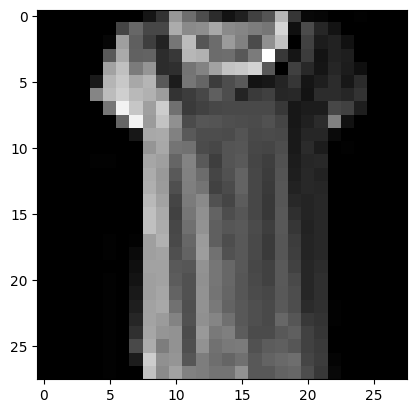

In [122]:
i = random.randint(0,60000)
plt.imshow(X_train[i], cmap='gray')

In [123]:
label =  y_train[i]
label

0

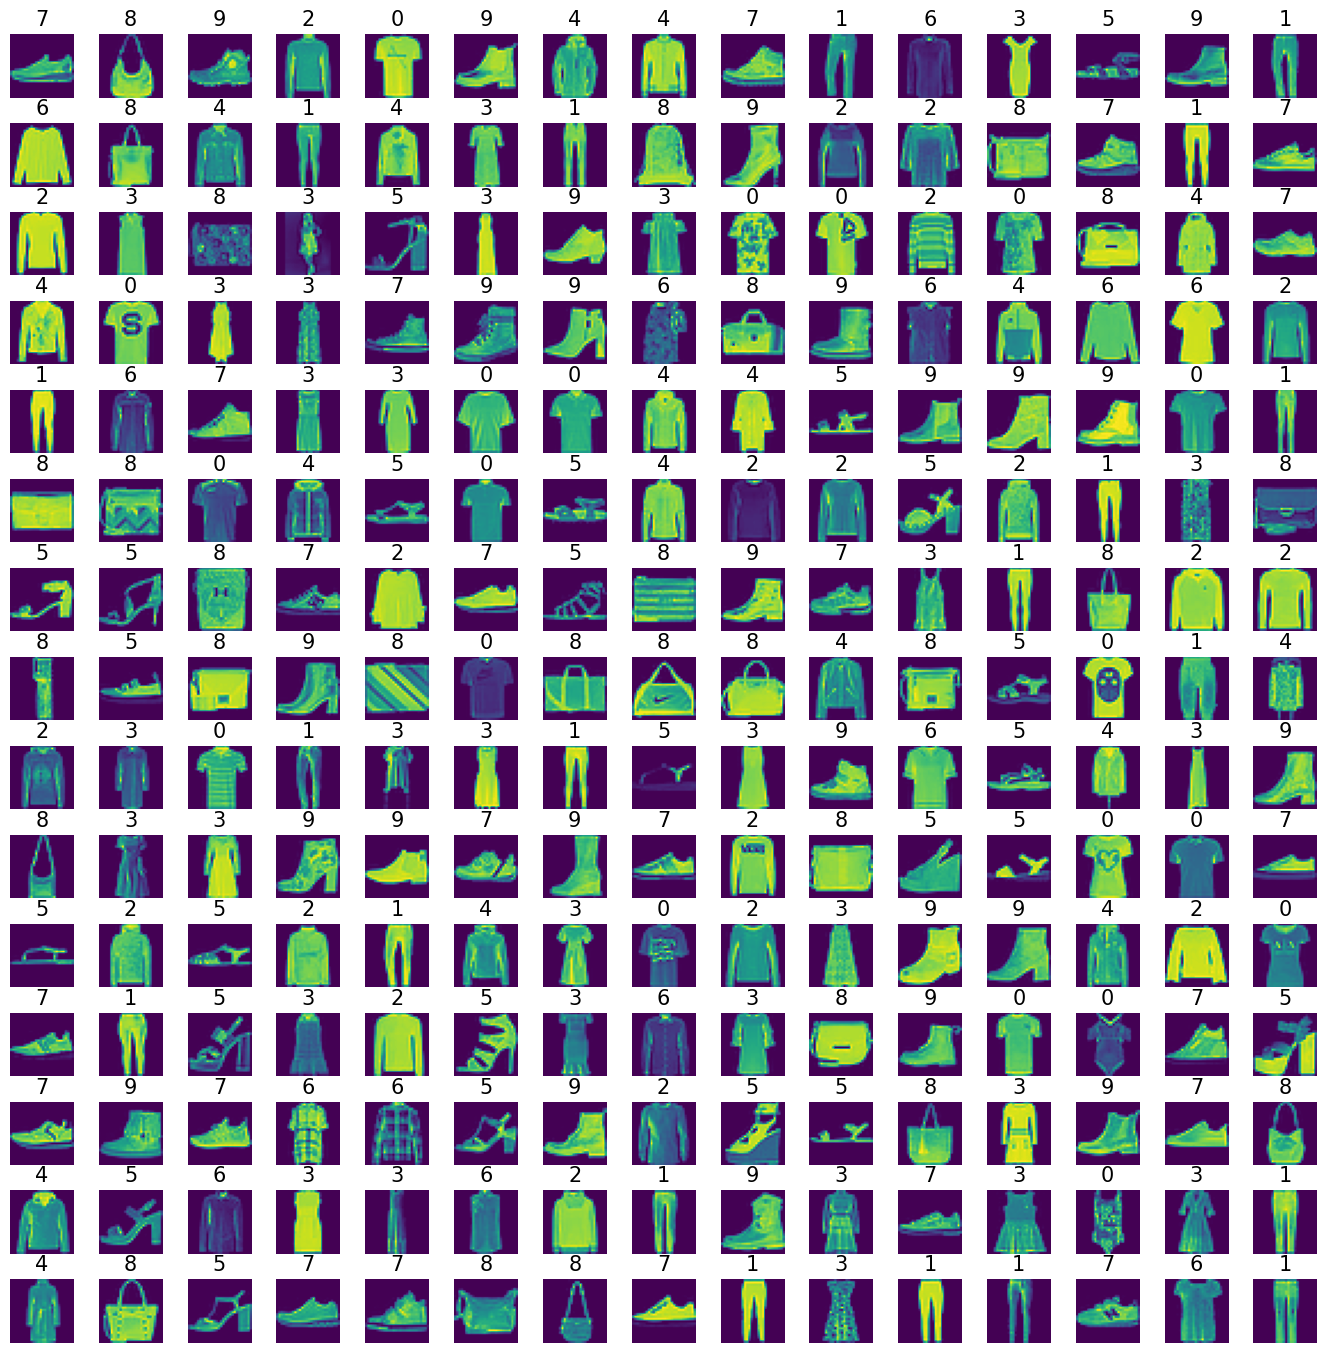

In [124]:
from operator import index
w_grid = 15
L_grid = 15

fig, axes = plt.subplots(figsize=(17,17), nrows=w_grid, ncols=L_grid)

axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, w_grid*L_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index], fontsize=15)
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Adding noise

In [125]:
X_train = X_train/255
X_test = X_test/255

In [126]:
added_noise = np.random.randn(*(28,28))

In [127]:
added_noise.shape

(28, 28)

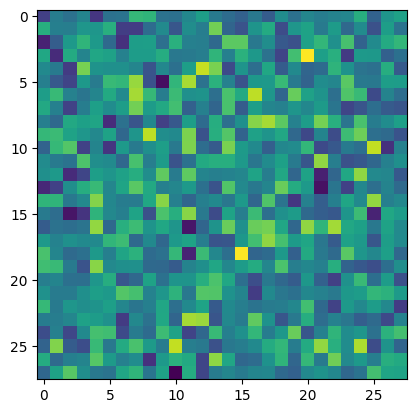

In [128]:
plt.imshow(added_noise)

In [129]:
noise_factor = 0.3
added_noise = added_noise * np.random.randn(*(28,28))

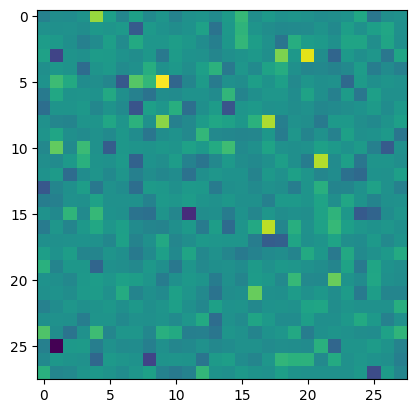

In [130]:
plt.imshow(added_noise)

In [131]:
noise_factor = 0.2
sample_image = X_train[10]
noisy_sample_image = sample_image + noise_factor * np.random.randn(*(28,28))

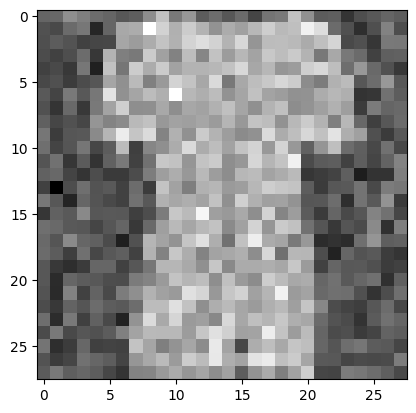

In [132]:
plt.imshow(noisy_sample_image, cmap='gray')

In [133]:
noisy_sample_image.max()

1.2728972379885302

In [134]:
noisy_sample_image.min()

-0.6441141871345013

In [135]:
noisy_sample_image = np.clip(noisy_sample_image, 0., 1.)

In [136]:
noisy_sample_image.max()

1.0

In [137]:
noisy_sample_image.min()

0.0

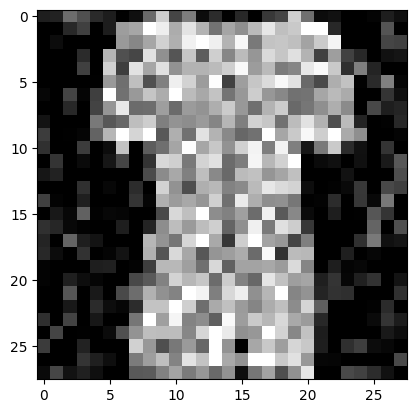

In [138]:
plt.imshow(noisy_sample_image, cmap='gray')

In [139]:
X_train_noisy = []
noise_factor = 0.2

for sample_image in X_train:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  X_train_noisy.append(sample_image_noisy)

In [140]:
type(X_train_noisy)

list

In [141]:
X_train_noisy = np.array(X_train_noisy)
type(X_train_noisy)

numpy.ndarray

In [142]:
X_train_noisy.shape

(60000, 28, 28)

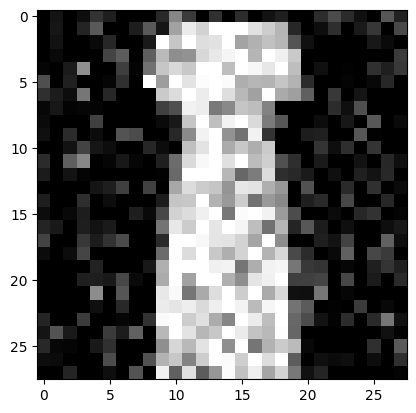

In [143]:
plt.imshow(X_train_noisy[50], cmap='gray')

In [144]:
X_test_noisy = []
noise_factor = 0.4

for sample_image in X_test:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  X_test_noisy.append(sample_image_noisy)

In [145]:
X_test_noisy = np.array(X_test_noisy)
type(X_test_noisy)

numpy.ndarray

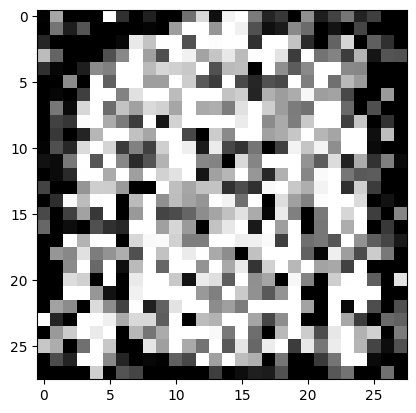

In [146]:
plt.imshow(X_test_noisy[50], cmap='gray')

# Set model

In [147]:
autoencoder = tf.keras.models.Sequential()

# Encoder
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding='same', input_shape=(28,28,1)))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding='same'))

autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding='same'))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding='same'))

# Encoded image
autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding='same'))

autoencoder.add(tf.keras.layers.UpSampling2D((2,2)))
autoencoder.add(tf.keras.layers.Conv2DTranspose(8, (3,3), strides=1, padding='same'))

autoencoder.add(tf.keras.layers.UpSampling2D((2,2)))
autoencoder.add(tf.keras.layers.Conv2DTranspose(1, (3,3), strides=1, padding='same', activation='sigmoid'))

autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 up_sampling2d_6 (UpSamplin  (None, 14, 14, 8)        

In [148]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [149]:
autoencoder.fit(X_train_noisy.reshape(-1, 28, 28, 1),
                X_train.reshape(-1, 28, 28, 1),
                epochs = 10,
                batch_size = 200)

Epoch 1/10
300/300 [==============================] - 42s 136ms/step - loss: 0.3653
Epoch 2/10
300/300 [==============================] - 40s 135ms/step - loss: 0.3101
Epoch 3/10
300/300 [==============================] - 40s 134ms/step - loss: 0.3051
Epoch 4/10
300/300 [==============================] - 44s 146ms/step - loss: 0.3021
Epoch 5/10
300/300 [==============================] - 41s 135ms/step - loss: 0.3000
Epoch 6/10
300/300 [==============================] - 40s 134ms/step - loss: 0.2985
Epoch 7/10
300/300 [==============================] - 40s 134ms/step - loss: 0.2974
Epoch 8/10
300/300 [==============================] - 40s 135ms/step - loss: 0.2963
Epoch 9/10
300/300 [==============================] - 41s 137ms/step - loss: 0.2955
Epoch 10/10
300/300 [==============================] - 40s 134ms/step - loss: 0.2947


In [150]:
denoised_images = autoencoder.predict(X_test_noisy[:15].reshape(-1, 28, 28, 1))

1/1 [==============================] - 0s 109ms/step


In [151]:
denoised_images.shape

(15, 28, 28, 1)

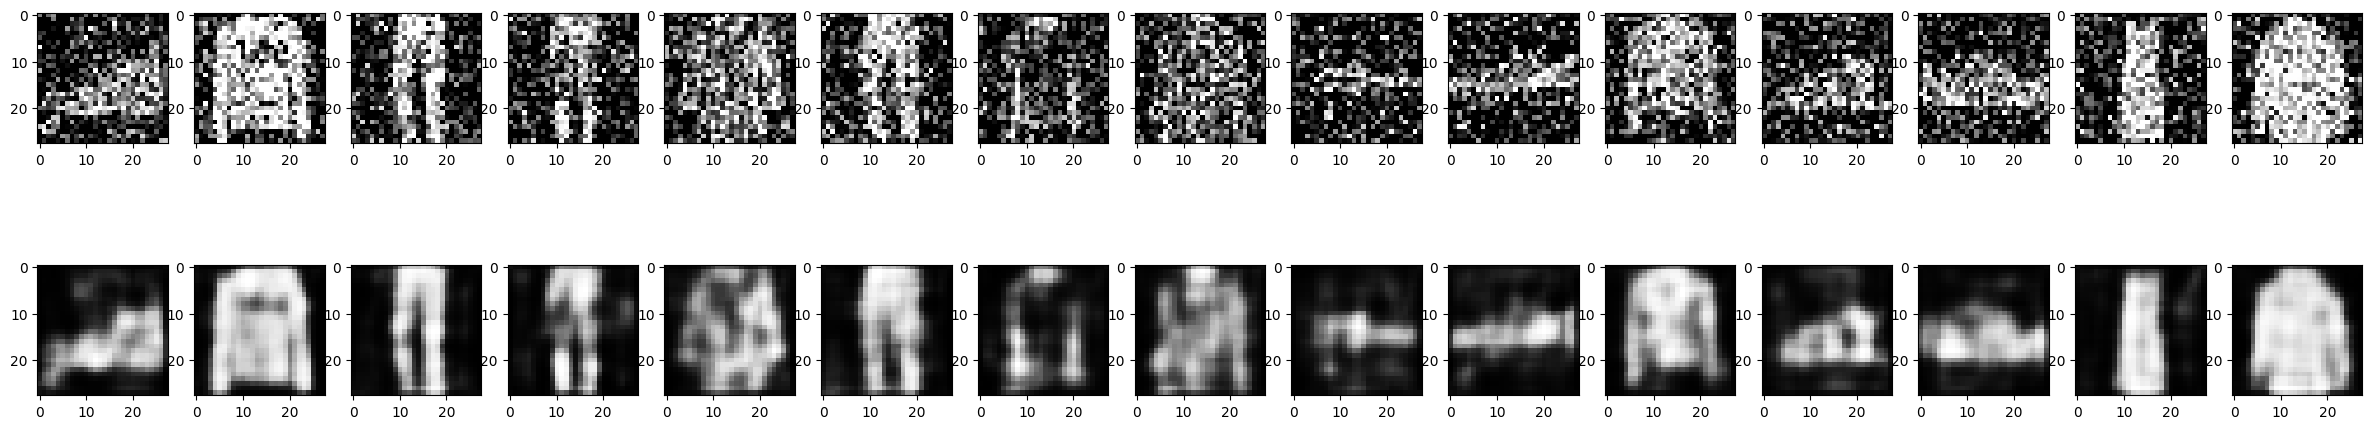

In [152]:
fig, axes = plt.subplots(nrows=2, ncols=15, figsize=(30,6))
for images, row in zip([X_test_noisy[:15], denoised_images], axes):
  for img, ax in zip(images, row):
    ax.imshow(img.reshape((28,28)), cmap='gray')